In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl


## DATA PREPARATION & VISUALIZATION 

We analyze the dataset and preprocess it in order to prepare it for using machine learning algorithms. In this data set, our target variable is “label” while the others are our features.

In [2]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [74]:
train = pd.read_csv("/Users/talhasagdan/Desktop/Assignment 2/train.csv").sample(3000)
test = pd.read_csv("/Users/talhasagdan/Desktop/Assignment 2/test.csv").sample(3000)

### a)  Split  data into X and y:

Creating two pandas data frames using train.csv , one containing all the input
features and the other containing the target label only. 

Naming these data frames as train_x_a and train_y respectively.

The same steps using test.csv to create the variables test_x, test_y.

In [75]:
train_x_a = train.drop(['Unnamed: 0'],axis=1)
train_y = pd.DataFrame(train['label'])
test_x = test
test_y = pd.DataFrame(test['label'])
train_x_a.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4251,1,0,0,0,0,0,0,0,0,0,...,93,40,0,0,0,0,0,0,0,0
16623,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10661,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,2,0,0,0,0,0,0,0,0,0,...,149,140,88,0,92,111,122,6,0,0
565,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### b)  Visualizing the data:

A function plot_image that will take a pandas rows of pixels as input and plot the resulting 28x28 image.

In [76]:

def plot_image(row):
    #row=row.drop(['label'],axis=1) #drop index and label in dataset
    num_classes = len(class_labels) #we have 10 class in dataset
    if (len(row.index) == 10):
        samples_per_class = 1
    else:
        samples_per_class = 3 #3 sample in each class
    for i in range(num_classes):
        if (len(row.index) == 10): #if we get mean 
            idxs = [0,1,2,3,4,5,6,7,8,9]
            plt.subplot(samples_per_class, num_classes, i+1) #showing number of image in a row
            plt.imshow(row.values.reshape(row.shape[0],28,28)[i]) #showing image in 28x28
            plt.title(class_labels[i])# showing titles for each class
        else: #without mean 
            idxs = np.flatnonzero(train_y == i)
            idxs = np.random.choice(idxs, samples_per_class, replace=False) #random choice in each class
            for j, idx in enumerate(idxs):
                plt_idx = j * num_classes + i + 1
                plt.subplot(samples_per_class, num_classes, plt_idx) #showing number of image in a row

                plt.imshow(row.values.reshape(row.shape[0],28,28)[idx]) #showing image in 28x28 
                plt.axis('off')
                if j == 0:
                    plt.title(class_labels[i])  #show title for each class 
    pass


### c) Class visualization:

Plotting 3 instances of each class in the training set.

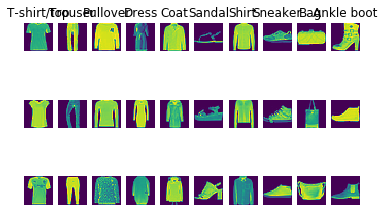

In [77]:
plot_image(train_x_a.iloc[:,1:]) #we drop label 

### d) Average visualization:

Plotting the average image for each class in the training set.
The average image for each class is calculated by taking the mean of each pixel column for that class.

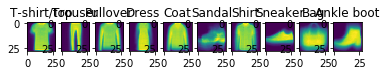

In [78]:
plot_image(train_x_a.groupby(['label']).mean()) #we group every class and we get mean

## BINARY CLASSIFICATION

We use Logistic Regression to perform binary classification using the pixel features in the dataset.

### e) Binary transformation:

To run binary classification we need to first transform our class labels to binary (0 and 1).

If the item is a piece of clothing ( T-shirt/top, Pullover, Shirt, Trouser, Dress, or Coat), label it as 1 and and if the item is non-clothing (Sandal, Sneaker, Bag, or Ankle boot), label it as 0. 

Store the result in a variable called train_y_e. 

Follow the same steps to create binary labels for the test set’s target column. 

Name this variable test_y_e .

In [79]:
train_y_e = train_y.replace([0, 2, 6,1, 3, 4],1).replace([5, 7, 8,9],0) #replace values with using indexes
train_y_e.head(10)

,label
4251,1
16623,0
10661,0
70,1
565,0
17140,1
3269,1
28768,1
12097,0
29970,1


In [80]:
test_y_e = test_y.replace([0, 2, 6,1, 3, 4],1).replace([5, 7, 8,9],0)#resplace values with using indexes
test_y_e.head(10)

,label
4984,0
2829,1
3363,1
2244,0
1091,1
4770,0
1681,1
1429,1
453,1
3715,1


### f) Binary Classification Model

a Logistic Regression model with default parameters.

5-fold Cross Validation on the training data and report the mean accuracy.

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection as CV

lr_model = LogisticRegression() # create logistic regression model
#train_x_a_without_label=train_x_a.drop(['label'],axis=1)
accuracy= CV.cross_val_score(lr_model, train_x_a,train_y, cv=5) # cross validation 5 fold
print("Accuracy of Model with 5 fold Cross Validation is: %",accuracy.mean() * 100) # get scores mean and give percentage 

/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tal

Accuracy of Model with 5 fold Cross Validation is: % 75.36164566742526


### g) Predict test data:

The model with train_x_a and train_y_e and predict the labels of test_x. 

Report the accuracy, confusion matrix, precision, recall and f1 score of these predictions.

/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1162   25]
 [  11 1802]]


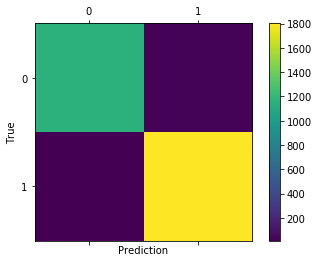

Accuracy: 0.988000 Precision: 0.986316 Recall: 0.993933 F1 score: 0.990110


In [82]:
from sklearn.metrics import confusion_matrix
# train the model
train_x_a_with_unnamed = train # its not working without unnamed column so i get again
                                # icannot change upside because of the running time
lm= lr_model.fit(train_x_a_with_unnamed,train_y_e)
pre=lm.predict(test_x)


# plot confusion matrix


conf_matrix=confusion_matrix(test_y_e,pre) #creating confusion matrix
print(conf_matrix)

figure=plt.figure() #creting figure
addsubplot=figure.add_subplot(111) #adding subplot
matshow=addsubplot.matshow(conf_matrix) #Display an array as a matrix in a new figure window.
figure.colorbar(matshow) #we get implement matshow to color bar


plt.xlabel('Prediction')
plt.ylabel('True')
plt.show() #plot confusion matrix



# print(accuracy, precision, recall, f1_score)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y_e, pre)

# precision tp / (tp + fp)
precision = precision_score(test_y_e, pre)

# recall: tp / (tp + fn)
recall = recall_score(test_y_e, pre)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y_e, pre)

print('Accuracy: %f' % accuracy,'Precision: %f' % precision,'Recall: %f' % recall,'F1 score: %f' % f1)

### h) Model evaluation:


Plotting the above model’s precision-recall curve and ROC curve. 

Reporting the ROC area under the curve (AUC) score.

Logistic: f1=0.990 auc=0.997


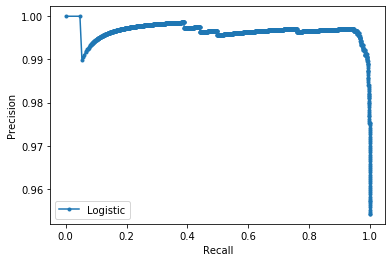

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.997


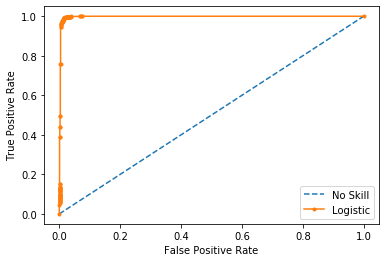

In [83]:




from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# plot precision-recall curve

lm_probs = lm.predict_proba(test_x) # for the probabilities we want to predicts for the logictic model
lm_probs = lm_probs[:, 1] #for the being positive
# we will predict class values  with using
lr_precision, lr_recall, _ = precision_recall_curve(test_y_e, lm_probs)
lr_f1, lr_auc = f1_score(test_y_e, pre), auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curve with the lr_recall and lr_precision we calculate
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()



# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test_y_e))]


# print AUC score
# calculation and printing scores
ns_auc = roc_auc_score(test_y_e, ns_probs)
lr_auc = roc_auc_score(test_y_e, lm_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))


# plot ROC curve
# calculation of theroc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y_e, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y_e, lm_probs)

# plot the roc curve
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

Logistic regression to perform multiclass classification with the original dataset labels.

### j) Training and cross validating logistic regression:

train_x_a and train_y to perform 3-fold cross validation on a logistic regression model with default parameters. with cv=3 . 

Reporting the mean accuracy.

In [85]:
# 3 fold Cross Validation on train_x_a and train_y
multi_cv = CV.cross_val_score(lm, train_x_a, train_y, cv=3)
#scores of each fold
print(multi_cv)
#Mean
print(multi_cv.mean())

/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tal

[0.77068794 0.759      0.76730191]
0.7656632806361924


### k) testing logistic regression:

Fitting a logistic regression model on the training set ( train_x_a, train_y) and calculating its test accuracy by using test_x. 

Print (the model’s confusion matrix on the test set)

In [86]:

# fit model
logisticModel = lm.fit(train_x_a_with_unnamed, train_y)


# test model
pred = lm.predict(test_x) #predictions
accuracym = accuracy_score(test_y, pred) #calculating accuracy score

print (accuracym*100)


# print confusion matrix
cmatrix = confusion_matrix(test_y, pred)
print(cmatrix)

/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/talhasagdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


76.56666666666668
[[201   4  12  10   2   0  58   0   5   0]
 [  0 294   3   2   0   0   7   0   1   0]
 [  6   2 187   3  45   0  46   0   5   0]
 [ 15  15  11 218  17   0  26   1   4   0]
 [  0   3  37   5 221   0  42   0   1   0]
 [  2   0   6   1   4 202  17  27   5  25]
 [ 48   4  37   9  28   0 172   0   6   0]
 [  0   0   4   0   0  13   0 242   0  34]
 [  1   0   4   1   4   0  20   2 264   2]
 [  0   0   1   0   0   2   1   7   0 296]]
